In [ ]:
from fim import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from paretoset import paretoset
import editdistance

# Turistic Places

In [ ]:
#df_turistic = pd.read_excel("https://www.mincetur.gob.pe/Datos_abiertos/DGET/Inventario_recursos_turisticos.xls")
df_turistic = pd.read_csv("https://www.mincetur.gob.pe/Datos_abiertos/DGET/Inventario_recursos_turisticos.csv", encoding='ISO-8859-1', sep=';')
df_turistic.head(20)

,REGIÓN,PROVINCIA,DISTRITO,CODIGO DEL RECURSO,NOMBRE DEL RECURSO,CATEGORÍA,TIPO DE CATEGORÍA,SUB TIPO CATEGORÍA,URL,LATITUD,LONGITUD,FECHA_DE_CORTE
0,Cusco,Cusco,CUSCO,11,Festividad Del Señor De Los Temblores,5. ACONTECIMIENTOS PROGRAMADOS,Fiestas,Fiestas religiosas-patronales,http://ficha.sigmincetur.mincetur.gob.pe/index...,-71.980100,-13.515300,20240403
1,Cusco,Canas,LANGUI,12,Laguna De Langui-Layo,1. SITIOS NATURALES,g. Cuerpo de Agua,Lagunas,http://ficha.sigmincetur.mincetur.gob.pe/index...,-71.166020,-14.499080,20240403
2,Cajamarca,Contumaza,YONAN,16,Petrogligos De Yonan,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,Petroglifos (Grabados en piedra),http://ficha.sigmincetur.mincetur.gob.pe/index...,-79.130786,-7.253108,20240403
3,Amazonas,Chachapoyas,LEVANTO,17,Sitio Arqueológico De Collacruz,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,Templos,http://ficha.sigmincetur.mincetur.gob.pe/index...,-77.898874,-6.308009,20240403
4,Amazonas,Chachapoyas,MAGDALENA,18,Caverna De Shihual,1. SITIOS NATURALES,m. Cavidades naturales,Grutas,http://ficha.sigmincetur.mincetur.gob.pe/index...,-77.881800,-6.372000,20240403
5,Huanuco,Huanuco,HUANUCO,20,Pinturas Rupestres De Quillarumi,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,Pintura Rupestre,http://ficha.sigmincetur.mincetur.gob.pe/index...,-76.290599,-9.937153,20240403
6,Huanuco,Ambo,AMBO,21,Laguna Rumichaca,1. SITIOS NATURALES,g. Cuerpo de Agua,Lagunas,http://ficha.sigmincetur.mincetur.gob.pe/index...,-76.126070,-10.096642,20240403
7,Huanuco,Lauricocha,SAN MIGUEL DE CAURI,22,Laguna De Lauricocha,1. SITIOS NATURALES,g. Cuerpo de Agua,Lagunas,http://ficha.sigmincetur.mincetur.gob.pe/index...,-76.663890,-10.315822,20240403
8,Huanuco,Lauricocha,SAN MIGUEL DE CAURI,23,Cueva De Lauricocha,1. SITIOS NATURALES,m. Cavidades naturales,Grutas,http://ficha.sigmincetur.mincetur.gob.pe/index...,-76.649873,-10.313969,20240403
9,Huanuco,Lauricocha,QUEROPALCA,24,Nevado De Yerupajá,1. SITIOS NATURALES,a. Montañas,Nevado,http://ficha.sigmincetur.mincetur.gob.pe/index...,-76.905241,-10.268641,20240403


In [ ]:
df_turistic.shape

(6705, 12)

## Count how many unique values for a column

In [4]:
#eliminar filas con valores NaN en la columna
df_turistic = df_turistic[df_turistic['SUB TIPO CATEGORÍA'].notna()]
df_turistic['SUB TIPO CATEGORÍA'] = [v.lower() for v in df_turistic['SUB TIPO CATEGORÍA'].values]

#print(sorted(df_turistic['SUB TIPO CATEGORÍA'].unique()))
for i1 in range(len(df_turistic['SUB TIPO CATEGORÍA'].unique())):
  for i2 in range(i1 + 1, len(df_turistic['SUB TIPO CATEGORÍA'].unique())):
    d = editdistance.eval(df_turistic['SUB TIPO CATEGORÍA'].unique()[i1], df_turistic['SUB TIPO CATEGORÍA'].unique()[i2])
    if d < 3:
      print(df_turistic['SUB TIPO CATEGORÍA'].unique()[i1], '-', df_turistic['SUB TIPO CATEGORÍA'].unique()[i2], d)

#combinar duplicados en la columna
df_turistic['SUB TIPO CATEGORÍA'] = [v.replace('templos', 'templo').
                                     replace('lagunas', 'lagos').
                                     replace('iglesias', 'templo').
                                     replace('tradicionales', 'tradiciones').
                                     replace('teatros', 'teatro').
                                     replace('grutas', 'gruta').
                                     replace('otros ', 'otros').
                                     replace('palacios', 'palacio').
                                     replace('plazas', 'plaza').
                                     replace('casas haciendas', 'casa-hacienda').
                                     replace('casonas', 'casona').
                                     replace('puertos, embarcaderos, caletas, muelles', 'puertos') for v in df_turistic['SUB TIPO CATEGORÍA'].values]

for v in sorted(df_turistic['SUB TIPO CATEGORÍA'].unique()):
  print(v)

templos - templo 1
grutas - gruta 1
puentes - puntas 2
puentes - puertos 2
puentes - cuentos 2
tradicionales - tradiciones 2
lagos - lodos 2
playas - plazas 1
playas - plaza 2
puntas - dunas 2
plazas - plaza 1
otros - otros  1
puertos - cuentos 2
lodos - lomas 2
cañones - casonas 2
teatros - teatro 1
cuevas - cuestas 2
palacio - palacios 1
casona - casonas 1
agricultura - acuicultura 2
cuentos - cuestas 2
acuicultura
agricultura
aguajales
aguas no termales
aguas termales
alamedas
albuferas
alfarería y cerámica
andenes
artesanales
bahías
barrios históricos
barrios tradiciones
bebidas típicas
biblioteca
bodegas de pisco, vinos y/u otroslicores
bosque de piedra
bosques
bosques de protección
bulevares
caletas
camino pintoresco
campos santos
canales de riego
capilla
casa de valor arquitectónico
casa-hacienda
casas históricas
casas museo
cascadas
casona
castillo
cataratas
catedral
cavernas
cañones
cementerios
centrales hidroeléctricas
centros de rescate o conservación
centros históricos
cent

## Create a copy of the dataframe for change columns

In [5]:
df_turistic['Ubicacion'] = df_turistic['REGIÓN'] + '-' + df_turistic['PROVINCIA'] #mantener a nivel provincial
df_turistic

,REGIÓN,PROVINCIA,DISTRITO,CODIGO DEL RECURSO,NOMBRE DEL RECURSO,CATEGORÍA,TIPO DE CATEGORÍA,SUB TIPO CATEGORÍA,URL,LATITUD,LONGITUD,FECHA_DE_CORTE,Ubicacion
0,Cusco,Cusco,CUSCO,11,Festividad Del Señor De Los Temblores,5. ACONTECIMIENTOS PROGRAMADOS,Fiestas,fiestas religiosas-patronales,http://ficha.sigmincetur.mincetur.gob.pe/index...,-71.980100,-13.515300,20240403,Cusco-Cusco
1,Cusco,Canas,LANGUI,12,Laguna De Langui-Layo,1. SITIOS NATURALES,g. Cuerpo de Agua,lagos,http://ficha.sigmincetur.mincetur.gob.pe/index...,-71.166020,-14.499080,20240403,Cusco-Canas
2,Cajamarca,Contumaza,YONAN,16,Petrogligos De Yonan,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,petroglifos (grabados en piedra),http://ficha.sigmincetur.mincetur.gob.pe/index...,-79.130786,-7.253108,20240403,Cajamarca-Contumaza
3,Amazonas,Chachapoyas,LEVANTO,17,Sitio Arqueológico De Collacruz,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,templo,http://ficha.sigmincetur.mincetur.gob.pe/index...,-77.898874,-6.308009,20240403,Amazonas-Chachapoyas
4,Amazonas,Chachapoyas,MAGDALENA,18,Caverna De Shihual,1. SITIOS NATURALES,m. Cavidades naturales,gruta,http://ficha.sigmincetur.mincetur.gob.pe/index...,-77.881800,-6.372000,20240403,Amazonas-Chachapoyas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,Cusco,Urubamba,OLLANTAYTAMBO,12780,Pueblo De Ollantaytambo,2. MANIFESTACIONES CULTURALES,Pueblos,tradiciones,http://ficha.sigmincetur.mincetur.gob.pe/index...,-72.264074,-13.258523,20240403,Cusco-Urubamba
6701,Pasco,Daniel Alcides Carrion,SANTA ANA DE TUSI,12784,Abrigo Rocoso De Arumachay,2. MANIFESTACIONES CULTURALES,Sitios Arqueológicos,cuevas,http://ficha.sigmincetur.mincetur.gob.pe/index...,-76.382915,-10.493643,20240403,Pasco-Daniel Alcides Carrion
6702,Junín,Huancayo,SAN JERÓNIMO DE TUNAN,12797,Fiesta Patronal San Roque,5. ACONTECIMIENTOS PROGRAMADOS,Fiestas,fiestas religiosas-patronales,http://ficha.sigmincetur.mincetur.gob.pe/index...,NaN,NaN,20240403,Junín-Huancayo
6703,Cusco,Espinar,PICHIGUA,12789,Qashwa De Sillota,3. FOLCLORE,Músicas y Danzas,música y danzas,http://ficha.sigmincetur.mincetur.gob.pe/index...,NaN,NaN,20240403,Cusco-Espinar


## Transform into transactional dataset

In [6]:
def to_transactionnal(df, column_trans, column_items):
  transactions = []
  for v in df[column_trans].unique():
    transactions.append(list(set(df[df[column_trans] == v][column_items].values)))
  return transactions

trans = to_transactionnal(df_turistic, 'Ubicacion', 'SUB TIPO CATEGORÍA')
print(len(trans))

196


In [7]:
print(df_turistic['Ubicacion'].unique()[0], trans[0])
print(df_turistic['Ubicacion'].unique()[20], trans[20])
print(df_turistic['Ubicacion'].unique()[50], trans[50])
print(df_turistic['Ubicacion'].unique()[100], trans[100])
print(df_turistic['Ubicacion'].unique()[150], trans[150])
print(df_turistic['Ubicacion'].unique()[190], trans[190])

Cusco-Cusco ['paseos peatonales', 'nevado', 'fiestas religiosas-patronales', 'plaza', 'convento', 'casa-hacienda', 'ferias artesanales', 'murallas', 'pintura rupestre', 'templo', 'andenes', 'música y danzas', 'jardines botánicos y viveros', 'zonas arqueológicas', 'festivales', 'otros', 'lagos', 'puentes', 'platos típicos', 'tradiciones', 'petroglifos (grabados en piedra)', 'campos santos', 'barrios tradiciones', 'danza', 'salas de exhibición', 'artesanales', 'quebradas', 'fiestas tradiciones(herranza, carnavales, otros)', 'cerros', 'miradores naturales', 'cascadas', 'fortalezas', 'ferias gastronómicas', 'museos']
Piura-Talara ['puntas', 'platos típicos', 'parques nacionales', 'plaza', 'caletas', 'bosques', 'playas', 'templo']
Ica-Nazca ['geoglifos (grabado en tierra)', 'zonas arqueológicas', 'platos típicos', 'plaza', 'cerros', 'reservas nacionales', 'otros', 'zonas reservadas', 'costumbres', 'playas', 'museos', 'templo', 'ciudadelas']
Amazonas-Luya ['tradiciones', 'cataratas', 'fiesta

## Mining itemsets

In [8]:
#todos los itemsets frecuentes con al menos 10% de soporte, y 2 atractivos como mínimo
r = fpgrowth(trans, supp=10, zmin=2)
df = pd.DataFrame(r)
df.columns = ['Itemset', 'Freq']
df.sort_values(by='Freq', ascending=False)

,Itemset,Freq
0,"(lagos, templo)",103
1,"(otros, templo)",97
4,"(fiestas religiosas-patronales, templo)",96
6,"(fiestas religiosas-patronales, lagos)",85
3,"(otros, lagos)",83
...,...,...
865,"(aguas termales, miradores naturales, fiestas ...",20
841,"(festivales, platos típicos)",20
840,"(festivales, platos típicos, templo)",20
835,"(festivales, fiestas tradiciones(herranza, car...",20


In [9]:
#función para obtener todos los itemsets frecuentes de un df
def all_itemsets(trans_, supp_=1):
  r = fpgrowth(trans_, supp=supp_, report='aS')
  df_items = pd.DataFrame(r)
  df_items.columns = ['Itemset', 'Freq', 'Freq(%)']
  df_items.sort_values(by='Freq', ascending=False, inplace=True)
  df_items['Size'] = [len(x) for x in df_items['Itemset'].values]
  df_items['Itemset'] = [str(sorted(x)) for x in df_items['Itemset'].values]
  return df_items

all_itemsets(trans, 5)

,Itemset,Freq,Freq(%),Size
0,['templo'],153,78.061224,1
2,['lagos'],126,64.285714,1
6,['otros'],110,56.122449,1
14,['fiestas religiosas-patronales'],109,55.612245,1
1,"['lagos', 'templo']",103,52.551020,2
...,...,...,...,...
9598,"['cataratas', 'cerros', 'gruta', 'lagos', 'otr...",10,5.102041,5
3993,"['lagos', 'miradores', 'platos típicos']",10,5.102041,3
9594,"['cerros', 'gruta', 'tradiciones']",10,5.102041,3
9593,"['cerros', 'gruta', 'miradores naturales', 'tr...",10,5.102041,4


## Emerging by location

In [10]:
df_turistic_lima = df_turistic[df_turistic['REGIÓN'] == 'Lima']
#df_turistic_lima.head()
trans_lima = to_transactionnal(df_turistic_lima, 'Ubicacion', 'SUB TIPO CATEGORÍA')
print(len(trans_lima))
print(trans_lima)

10
[['paseos peatonales', 'pinacotecas(pinturas)', 'humedales', 'mitos', 'sitios de batalla', 'plaza', 'fiestas religiosas-patronales', 'áreas de conservación regional', 'museos de sitio', 'convento', 'casa-hacienda', 'ferias artesanales', 'murallas', 'mercados  artesanales', 'lomas', 'capilla', 'alamedas', 'templo', 'pintura rupestre', 'barrios históricos', 'jardines botánicos y viveros', 'música y danzas', 'zonas arqueológicas', 'miradores', 'casa de valor arquitectónico', 'camino pintoresco', 'concursos', 'casas museo', 'festivales', 'otros', 'áreas de conservación privada', 'lagos', 'bebidas típicas', 'puentes', 'islas', 'bodegas de pisco, vinos y/u otroslicores', 'pinturas murales', 'centros históricos', 'valles', 'platos típicos', 'leyendas', 'tradiciones', 'casona', 'históricos', 'campos santos', 'barrios tradiciones', 'malecones', 'bosques', 'salas de exhibición', 'palacio', 'fiestas tradiciones(herranza, carnavales, otros)', 'quebradas', 'dulces típicos', 'agricultura', 'zooló

In [11]:
df_turistic_not_lima = df_turistic[df_turistic['REGIÓN'] != 'Lima']
trans_not_lima = to_transactionnal(df_turistic_not_lima, 'Ubicacion', 'SUB TIPO CATEGORÍA')
print(len(trans_not_lima))
print(trans_not_lima)

186
[['paseos peatonales', 'nevado', 'fiestas religiosas-patronales', 'plaza', 'convento', 'casa-hacienda', 'ferias artesanales', 'murallas', 'pintura rupestre', 'templo', 'andenes', 'música y danzas', 'jardines botánicos y viveros', 'zonas arqueológicas', 'festivales', 'otros', 'lagos', 'puentes', 'platos típicos', 'tradiciones', 'petroglifos (grabados en piedra)', 'campos santos', 'barrios tradiciones', 'danza', 'salas de exhibición', 'artesanales', 'quebradas', 'fiestas tradiciones(herranza, carnavales, otros)', 'cerros', 'miradores naturales', 'cascadas', 'fortalezas', 'ferias gastronómicas', 'museos'], ['música y danzas', 'gruta', 'históricos', 'reservas comunales', 'fiestas religiosas-patronales', 'plaza', 'cerros', 'festivales', 'casas históricas', 'otros', 'cuarteles', 'lagos', 'templo', 'puentes'], ['valles', 'platos típicos', 'miradores', 'petroglifos (grabados en piedra)', 'manantiales', 'fiestas religiosas-patronales', 'otros', 'lagos', 'represas', 'museos', 'templo'], ['zo

In [12]:
df_itemsets_lima = all_itemsets(trans_lima, 20)
df_itemsets_not_lima = all_itemsets(trans_not_lima, 20)

In [ ]:
emerging = df_itemsets_lima.join(df_itemsets_not_lima.set_index('Itemset'),
                                 on='Itemset', lsuffix='_l', rsuffix='_nl', how='outer').fillna(0)
emerging['GrowthRate_l'] = (emerging['Freq(%)_l'] / emerging['Freq(%)_nl'])
emerging['GrowthRate_nl'] = (emerging['Freq(%)_nl'] / emerging['Freq(%)_l'])
emerging['Freq'] = emerging['Freq_l'] + emerging['Freq_nl']
emerging.sort_values(by='GrowthRate_l', ascending=False)

,Itemset,Freq_l,Freq(%)_l,Size_l,Freq_nl,Freq(%)_nl,Size_nl,GrowthRate_l,GrowthRate_nl,Freq
7879285.0,"['bebidas típicas', 'capilla', 'casa de valor ...",2.0,20.0,11.0,0.0,0.000000,0.0,inf,0.0,2.0
8999.0,"['casa-hacienda', 'fiestas religiosas-patronal...",2.0,20.0,5.0,0.0,0.000000,0.0,inf,0.0,2.0
9089.0,"['casa-hacienda', 'festivales', 'museos', 'otr...",2.0,20.0,6.0,0.0,0.000000,0.0,inf,0.0,2.0
9114.0,"['casa-hacienda', 'fiestas religiosas-patronal...",2.0,20.0,6.0,0.0,0.000000,0.0,inf,0.0,2.0
9108.0,"['casa-hacienda', 'festivales', 'lagos', 'plat...",2.0,20.0,6.0,0.0,0.000000,0.0,inf,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
NaN,['petroglifos (grabados en piedra)'],0.0,0.0,0.0,41.0,22.162162,1.0,0.0,inf,41.0
NaN,"['petroglifos (grabados en piedra)', 'templo']",0.0,0.0,0.0,38.0,20.540541,2.0,0.0,inf,38.0
NaN,"['aguas termales', 'otros']",0.0,0.0,0.0,38.0,20.540541,2.0,0.0,inf,38.0
NaN,"['aguas termales', 'lagos', 'templo']",0.0,0.0,0.0,38.0,20.540541,3.0,0.0,inf,38.0


In [ ]:
mask = paretoset(emerging[['Freq', 'Size_l']], sense=['max', 'max'])
sky_itemsets = emerging[mask]
print(len(sky_itemsets))
sky_itemsets

9


,Itemset,Freq_l,Freq(%)_l,Size_l,Freq_nl,Freq(%)_nl,Size_nl,GrowthRate_l,GrowthRate_nl,Freq
0.0,"['lagos', 'templo']",9.0,90.0,2.0,91.0,49.189189,2.0,1.829670,0.546547,100.0
1.0,['lagos'],9.0,90.0,1.0,114.0,61.621622,1.0,1.460526,0.684685,123.0
2.0,"['fiestas religiosas-patronales', 'lagos', 'te...",9.0,90.0,3.0,59.0,31.891892,3.0,2.822034,0.354354,68.0
6.0,"['fiestas religiosas-patronales', 'lagos', 'ot...",7.0,70.0,4.0,44.0,23.783784,4.0,2.943182,0.339768,51.0
2014.0,"['fiestas religiosas-patronales', 'lagos', 'mú...",5.0,50.0,6.0,0.0,0.000000,0.0,inf,0.000000,5.0
150.0,"['festivales', 'fiestas religiosas-patronales'...",4.0,40.0,7.0,0.0,0.000000,0.0,inf,0.000000,4.0
9262.0,"['casa-hacienda', 'dulces típicos', 'festivale...",3.0,30.0,11.0,0.0,0.000000,0.0,inf,0.000000,3.0
4326862.0,"['bebidas típicas', 'capilla', 'casa de valor ...",2.0,20.0,23.0,0.0,0.000000,0.0,inf,0.000000,2.0
NaN,['templo'],0.0,0.0,0.0,143.0,77.297297,1.0,0.000000,inf,143.0


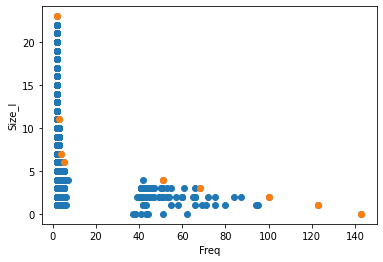

In [ ]:
plt.scatter('Freq', 'Size_l', data=emerging)
plt.scatter('Freq', 'Size_l', data=sky_itemsets)
plt.xlabel('Freq')
plt.ylabel('Size_l')
plt.show()

In [ ]:
mask = paretoset(emerging[['Freq', 'Size_l', 'GrowthRate_l']], sense=['max', 'max', 'max'])
sky_itemsets = emerging[mask]
print(len(sky_itemsets))
sky_itemsets

14


,Itemset,Freq_l,Freq(%)_l,Size_l,Freq_nl,Freq(%)_nl,Size_nl,GrowthRate_l,GrowthRate_nl,Freq
0.0,"['lagos', 'templo']",9.0,90.0,2.0,91.0,49.189189,2.0,1.829670,0.546547,100.0
4.0,"['fiestas religiosas-patronales', 'lagos']",9.0,90.0,2.0,66.0,35.675676,2.0,2.522727,0.396396,75.0
5.0,['fiestas religiosas-patronales'],9.0,90.0,1.0,85.0,45.945946,1.0,1.958824,0.510511,94.0
1.0,['lagos'],9.0,90.0,1.0,114.0,61.621622,1.0,1.460526,0.684685,123.0
3.0,"['fiestas religiosas-patronales', 'templo']",9.0,90.0,2.0,75.0,40.540541,2.0,2.220000,0.450450,84.0
2.0,"['fiestas religiosas-patronales', 'lagos', 'te...",9.0,90.0,3.0,59.0,31.891892,3.0,2.822034,0.354354,68.0
22.0,"['fiestas religiosas-patronales', 'lagos', 'te...",7.0,70.0,4.0,0.0,0.000000,0.0,inf,0.000000,7.0
26.0,"['fiestas religiosas-patronales', 'lagos', 'tr...",7.0,70.0,3.0,37.0,20.000000,3.0,3.500000,0.285714,44.0
6.0,"['fiestas religiosas-patronales', 'lagos', 'ot...",7.0,70.0,4.0,44.0,23.783784,4.0,2.943182,0.339768,51.0
2014.0,"['fiestas religiosas-patronales', 'lagos', 'mú...",5.0,50.0,6.0,0.0,0.000000,0.0,inf,0.000000,5.0


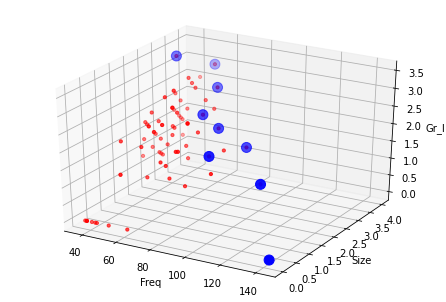

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
#crear ejes en 3D para la figura
ax = Axes3D(fig)
#poner etiquetas a los ejes
ax.set_xlabel('Freq')
ax.set_ylabel('Size')
ax.set_zlabel('Gr_l')
#plotear por dispersión los puntos
ax.scatter(emerging['Freq'],
           emerging['Size_l'],
           emerging['GrowthRate_l'],
           color='r',s=10)
ax.scatter(sky_itemsets['Freq'],
           sky_itemsets['Size_l'],
           sky_itemsets['GrowthRate_l'],
           color='b',s=100)
plt.show()

###Radar Charts

In [ ]:
import plotly.graph_objects as go

def radar_chart(df_, row_, dimensions_):
  fig = go.Figure()
  fig.add_trace(go.Scatterpolar(r=df_.iloc[row_,:].values,
                                theta=dimensions_,
                                fill='toself',
                                name=str(df_.iloc[row_,0])))
  fig.show()

In [ ]:
#recuperar el skypattern 5 de la lista
print(sky_itemsets.iloc[5,:])
radar_chart(sky_itemsets[['Freq','Size_l','GrowthRate_l']], 5, sky_itemsets[['Freq','Size_l','GrowthRate_l']].columns)

Itemset          ['fiestas religiosas-patronales', 'lagos', 'te...
Freq_l                                                         9.0
Freq(%)_l                                                     90.0
Size_l                                                         3.0
Freq_nl                                                       59.0
Freq(%)_nl                                               31.891892
Size_nl                                                        3.0
GrowthRate_l                                              2.822034
GrowthRate_nl                                             0.354354
Freq                                                          68.0
Name: 2.0, dtype: object


In [ ]:
#recuperar el skypattern 0 de la lista
print(sky_itemsets.iloc[0,:])
radar_chart(sky_itemsets[['Freq','Size_l','GrowthRate_l']], 0, sky_itemsets[['Freq','Size_l','GrowthRate_l']].columns)

Itemset          ['lagos', 'templo']
Freq_l                           9.0
Freq(%)_l                       90.0
Size_l                           2.0
Freq_nl                         91.0
Freq(%)_nl                 49.189189
Size_nl                          2.0
GrowthRate_l                 1.82967
GrowthRate_nl               0.546547
Freq                           100.0
Name: 0.0, dtype: object


In [ ]:
#recuperar el skypattern 13 de la lista
print(sky_itemsets.iloc[13,:])
radar_chart(sky_itemsets[['Freq','Size_l','GrowthRate_l']], 13, sky_itemsets[['Freq','Size_l','GrowthRate_l']].columns)

Itemset          ['templo']
Freq_l                  0.0
Freq(%)_l               0.0
Size_l                  0.0
Freq_nl               143.0
Freq(%)_nl        77.297297
Size_nl                 1.0
GrowthRate_l            0.0
GrowthRate_nl           inf
Freq                  143.0
Name: nan, dtype: object


#Skyrules

##All Rules

In [ ]:
def all_rules(trans_, supp_=10, conf_=60):
  r = fpgrowth(trans_, target='r', supp=supp_, conf=conf_, zmin=2, report='scl')
  df_rules = pd.DataFrame(r)
  df_rules.columns = ['Consequent', 'Antecedent', 'Freq', 'Conf', 'Lift']
  return df_rules

all_rules(trans)

,Consequent,Antecedent,Freq,Conf,Lift
0,templo,"(lagos,)",0.512821,0.813008,1.036187
1,lagos,"(templo,)",0.512821,0.653595,1.036187
2,templo,"(otros,)",0.446154,0.915789,1.167183
3,templo,"(otros, lagos)",0.338462,0.916667,1.168301
4,lagos,"(otros, templo)",0.338462,0.758621,1.202691
...,...,...,...,...,...
3366,templo,"(lugares pintorescos de flora y fauna,)",0.087179,0.809524,1.031746
3367,lagos,"(lugares pintorescos de flora y fauna,)",0.082051,0.761905,1.207898
3368,otros,"(lugares pintorescos de flora y fauna,)",0.076923,0.714286,1.466165
3369,fiestas religiosas-patronales,"(lugares pintorescos de flora y fauna,)",0.076923,0.714286,1.481763


In [ ]:
df_rules = all_rules(trans, 5, 10)
df_rules

,Consequent,Antecedent,Freq,Conf,Lift
0,templo,"(lagos,)",0.512821,0.813008,1.036187
1,lagos,"(templo,)",0.512821,0.653595,1.036187
2,templo,"(otros,)",0.446154,0.915789,1.167183
3,otros,"(templo,)",0.446154,0.568627,1.167183
4,templo,"(otros, lagos)",0.338462,0.916667,1.168301
...,...,...,...,...,...
458072,cavernas,"(áreas de conservación privada, cataratas)",0.005128,0.100000,19.500000
458073,pasos o abras,"(nevado, históricos)",0.005128,0.100000,19.500000
458074,pasos o abras,"(nevado, quebradas, música y danzas)",0.005128,0.100000,19.500000
458075,lugares paleontológicos(fósiles),"(casa de valor arquitectónico, bosques, templo)",0.005128,0.100000,19.500000


##Pareto Optimization

In [ ]:
mask = paretoset(df_rules.iloc[:,2:], sense = ['max', 'max', 'max'])
sky_rules = df_rules[mask]
print(len(sky_rules))
sky_rules

70


,Consequent,Antecedent,Freq,Conf,Lift
0,templo,"(lagos,)",0.512821,0.813008,1.036187
2,templo,"(otros,)",0.446154,0.915789,1.167183
4,templo,"(otros, lagos)",0.338462,0.916667,1.168301
12,lagos,"(fiestas religiosas-patronales, templo)",0.348718,0.809524,1.283391
13,fiestas religiosas-patronales,"(lagos, templo)",0.348718,0.680000,1.410638
...,...,...,...,...,...
287364,playas,"(malecones, templo)",0.051282,0.833333,4.513889
321136,barrios tradiciones,"(puentes, plaza, fiestas religiosas-patronales...",0.035897,0.538462,11.666667
321149,barrios tradiciones,"(puentes, plaza, miradores naturales, templo)",0.030769,0.600000,13.000000
357448,concursos,"(históricos, museos, fiestas religiosas-patron...",0.025641,0.500000,16.250000


In [ ]:
#las reglas fuertes tienen confianza mayor o igual al 80% y el lift debe ser mayor a 1 para tener una confianza válida
sky_rules[(sky_rules['Conf'] >= 0.8) & (sky_rules['Lift'] > 1)].sort_values(by='Conf', ascending=False)

,Consequent,Antecedent,Freq,Conf,Lift
146868,miradores naturales,"(cascadas, otros, templo)",0.087179,1.000000,2.746479
31680,plaza,"(fiestas tradiciones(herranza, carnavales, otr...",0.056410,1.000000,3.545455
1179,fiestas religiosas-patronales,"(música y danzas, miradores naturales, otros, ...",0.112821,1.000000,2.074468
1162,lagos,"(música y danzas, miradores naturales, fiestas...",0.133333,1.000000,1.585366
78863,templo,"(casa de valor arquitectónico,)",0.169231,1.000000,1.274510
35,templo,"(tradiciones, otros)",0.256410,0.980392,1.249519
1163,fiestas religiosas-patronales,"(música y danzas, miradores naturales, lagos)",0.133333,0.962963,1.997636
47,templo,"(tradiciones, fiestas religiosas-patronales)",0.261538,0.962264,1.226415
146880,miradores naturales,"(cascadas, otros)",0.097436,0.950000,2.609155
186,templo,"(museos,)",0.333333,0.942029,1.200625


##Plotting

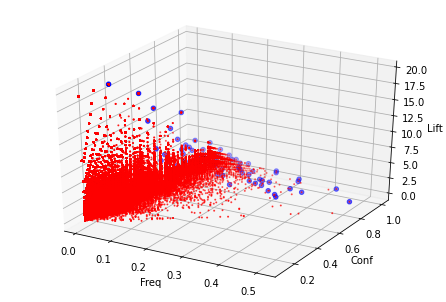

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel('Freq')
ax.set_ylabel('Conf')
ax.set_zlabel('Lift')

ax.scatter(df_rules.iloc[:,2], df_rules.iloc[:,3], df_rules.iloc[:,4], color='r', s=1)
ax.scatter(sky_rules.iloc[:,2], sky_rules.iloc[:,3], sky_rules.iloc[:,4], color='b', s=20)
plt.show()

###Radar Charts

In [ ]:
#radar chart del skyrule 3
radar_chart(sky_rules.iloc[:,2:], 3, sky_rules.columns[2:])

In [ ]:
#radar chart del skyrule 53
radar_chart(sky_rules.iloc[:,2:], 53, sky_rules.columns[2:])

###Parallel Coordinates

In [ ]:
from pandas.plotting import parallel_coordinates

df_ = sky_rules.copy()
df_['Id'] = [i for i in range(len(sky_rules))]
df_

,Consequent,Antecedent,Freq,Conf,Lift,Id
0,templo,"(lagos,)",0.512821,0.813008,1.036187,0
2,templo,"(otros,)",0.446154,0.915789,1.167183,1
4,templo,"(otros, lagos)",0.338462,0.916667,1.168301,2
12,lagos,"(fiestas religiosas-patronales, templo)",0.348718,0.809524,1.283391,3
13,fiestas religiosas-patronales,"(lagos, templo)",0.348718,0.680000,1.410638,4
...,...,...,...,...,...,...
287364,playas,"(malecones, templo)",0.051282,0.833333,4.513889,65
321136,barrios tradiciones,"(puentes, plaza, fiestas religiosas-patronales...",0.035897,0.538462,11.666667,66
321149,barrios tradiciones,"(puentes, plaza, miradores naturales, templo)",0.030769,0.600000,13.000000,67
357448,concursos,"(históricos, museos, fiestas religiosas-patron...",0.025641,0.500000,16.250000,68


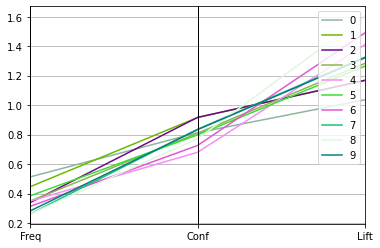

In [ ]:
parallel_coordinates(df_.iloc[:10,2:], 'Id') #para seleccionar las 10 primeras reglas con sus valores desde la 2da columna
plt.show()

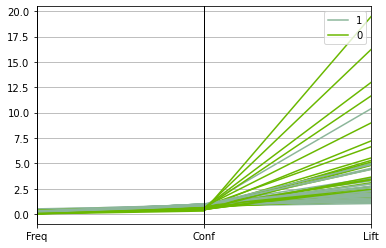

In [ ]:
df_['Id2'] = [1 if v >= 0.8 else 0 for v in df_['Conf']] #para clasificar las reglas que superan el 80% de un color y las otras de otro
parallel_coordinates(df_[['Freq','Conf','Lift','Id2']], 'Id2')
plt.show()

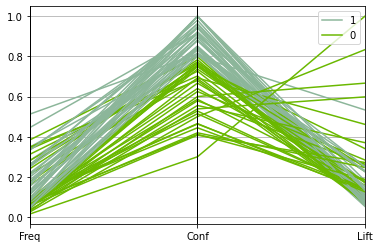

In [ ]:
df2_ = df_.copy()
df2_['Lift'] = df2_['Lift'] / df2_['Lift'].max()
parallel_coordinates(df2_[['Freq','Conf','Lift','Id2']], 'Id2')
plt.show()